### Date: 09/18/2024
### Assignment 1: Concrete Strength Regression

### Group 07:
    Guan-Lun Zeng
    Sangita Banik
    Bipasha Kapil

### Objective:
To estimate the compressive strength of concrete based on its components and age using multilinear regression.

### Problem Statement:
Structural engineers need to know the strength of materials to design safe structures. As a machine learning developer working for an engineering company, the goal is to develop a model that predicts the compressive strength of concrete based on its composition and age. Additionally, the model must provide uncertainty in strength prediction to ensure safety in designs.

## Step 1: Data Loading and Initial Exploration

In [1]:
# importing necessary libraries 

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import math


Bad key text.latex.preview in file c:\Users\aqua6\anaconda3\envs\NN\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file c:\Users\aqua6\anaconda3\envs\NN\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file c:\Users\aqua6\anaconda3\envs\NN\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default qualit

In [2]:
# Loading the dataset and displaying few rows
df = pd.read_csv("Concrete_Data_Yeh.csv")
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## Step 2: Data Summarization and Explanation

In [3]:
# Summarizing the dataset
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## Explanation:

**cement: a substance used for construction that hardens to other materials to bind them together.

**slag: Mixture of metal oxides and silicon dioxide.

**Flyash: coal combustion product that is composed of the particulates that are driven out of coal-fired boilers together with the flue gases.

**Water: It is used to form a thick paste.

**Superplasticizer:  used in making high-strength concrete.

**Coaseseaggregate: prices of rocks obtain from ground deposits. 

**fineaggregate: the size of aggregate small than 4.75mm.

**age: Rate of gain of strength is faster to start with and the rate gets reduced with age.

**csMPa: Measurement unit of concrete strength.

#### Observation:
1. There is a relatively large difference between min & max in the age column, meaning the distribution varies.
2. Column like superplasticizer, its mean & 50% quartile are close, meaning the distribution is relatively even. While column like slag, the gap between its mean & 50% quartile is relatively large, meaning its distribution is not that even, there might be left skewed.

## Step 3: Checking Data Types and Cleaning Data

In [4]:
# Display datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Observation:
All data types are appropriate. No missing values are present.

In [5]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 25


In [6]:
# Drop duplicate rows if there's any
df = df.drop_duplicates()

In [7]:
# Check dataset again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1005 non-null   float64
 1   slag              1005 non-null   float64
 2   flyash            1005 non-null   float64
 3   water             1005 non-null   float64
 4   superplasticizer  1005 non-null   float64
 5   coarseaggregate   1005 non-null   float64
 6   fineaggregate     1005 non-null   float64
 7   age               1005 non-null   int64  
 8   csMPa             1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


#### Observation:
1. There is no null value in this dataset, so we didn't use dropna() function
2. We found there are 25 duplicated rows, so we use drop_duplicates() function to drop them. After we check again the number of data, it shows that there are 1005 rows remain.
3. For the data type, the data type are all numbers(instead of str or other type), which shows that there are no problem of incorrect data types

## Step 4: Correlation Analysis

<AxesSubplot:>

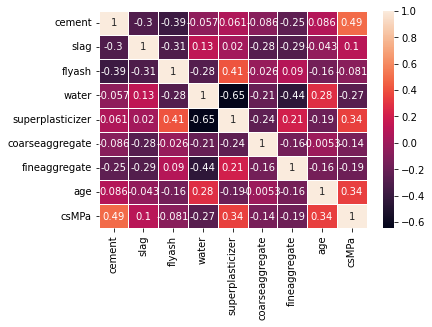

In [8]:
# Correlation matrix
corr_df = df.corr()

sns.heatmap(corr_df,linewidths=1,annot=True)

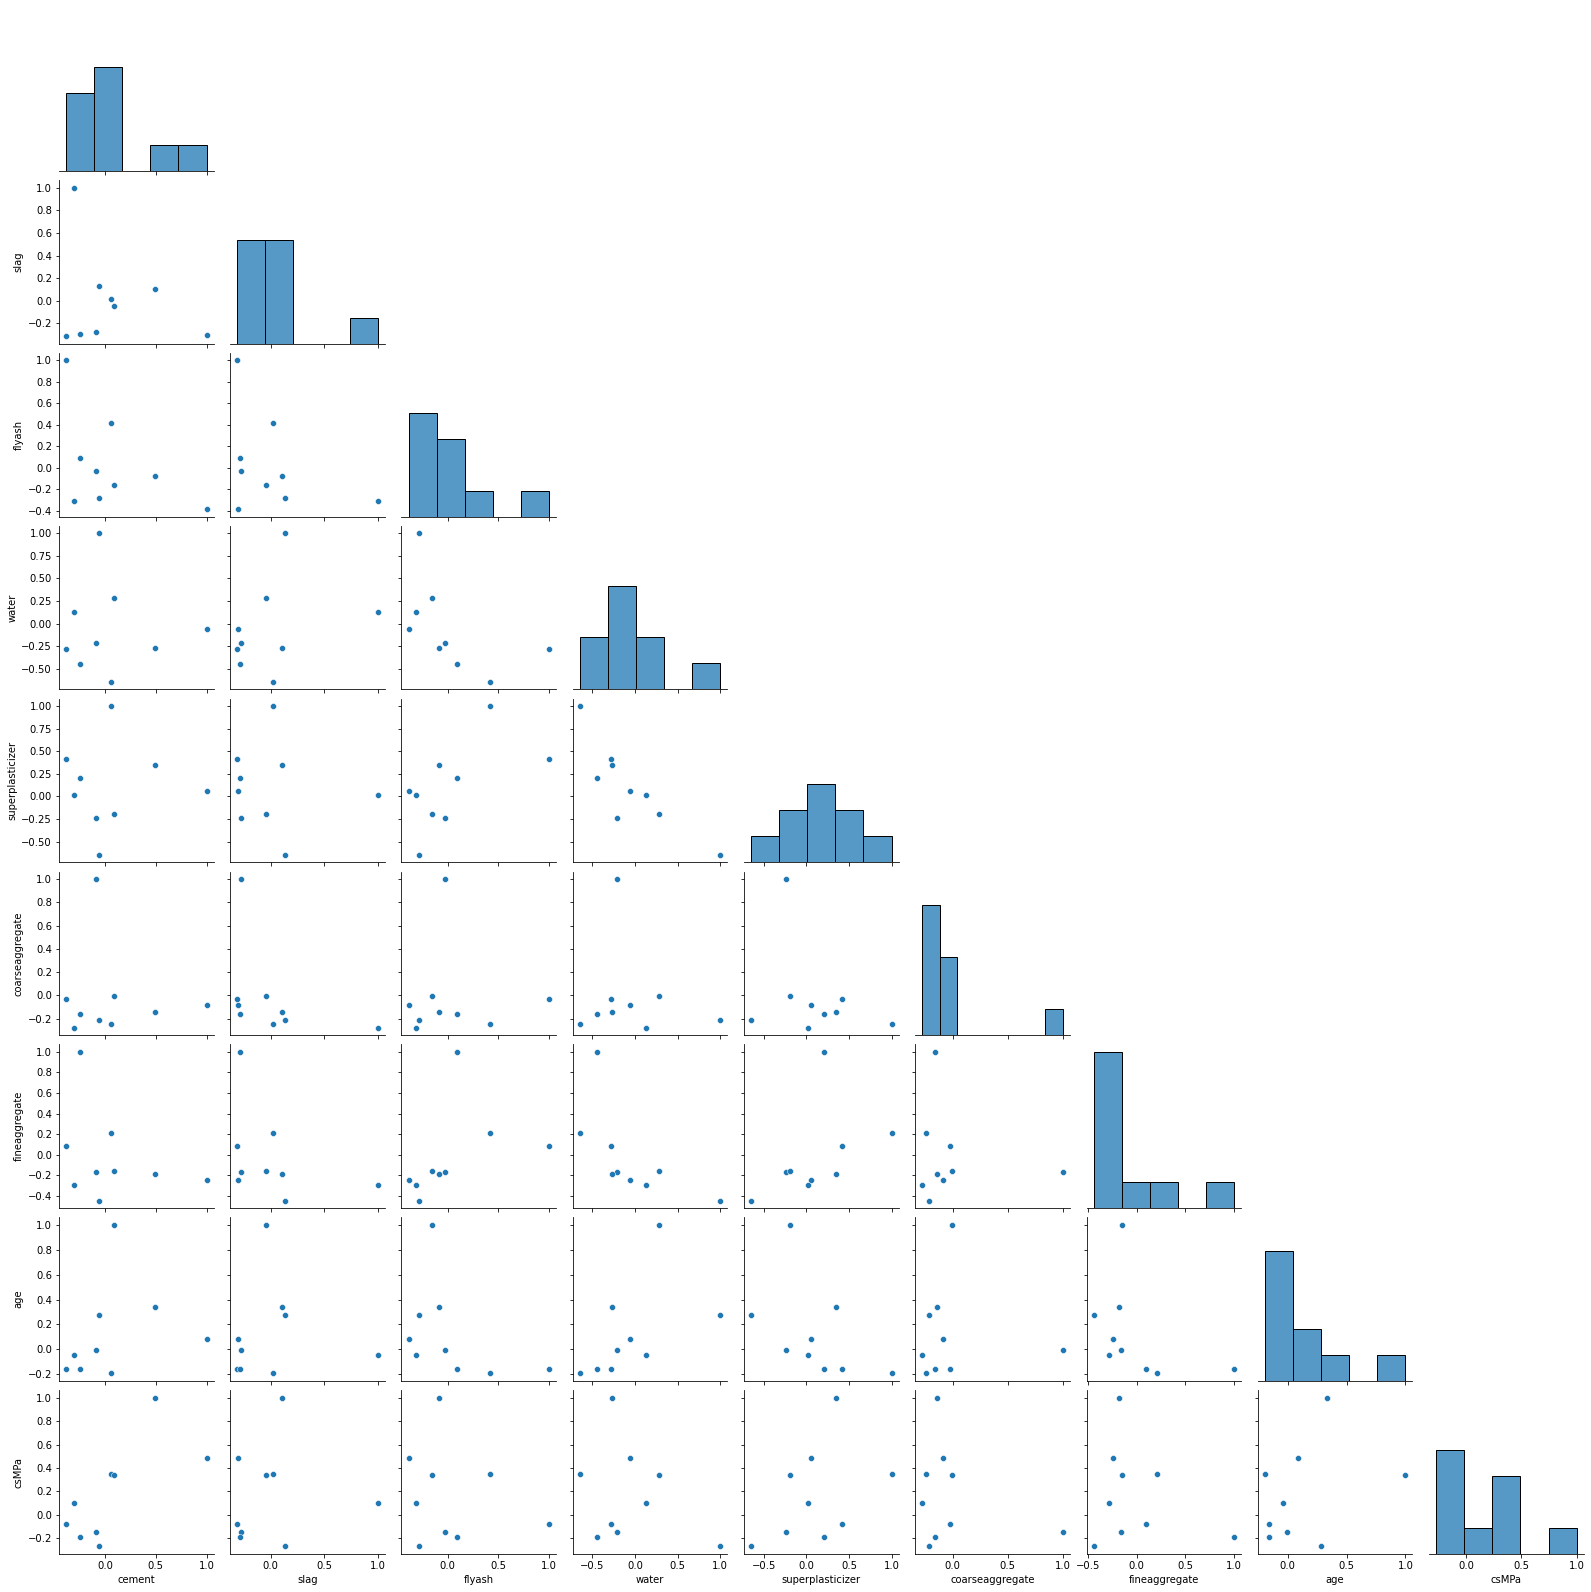

In [9]:
# Pairplot to visualize relationships
sns.pairplot(corr_df, corner=True)

#### Observations: 
From the heatmap, we can see csMPa has highese correlation with "superplasticizer", and the second highest with "age". The least correalted is with "water".
From the pairplot, we can also observe that superplasticizer, age and csMPa seems to have linear relation.
Besides, we can see the distribution of data of superplasticizer is the best because the distribution form is like bell-shaped.

## Step 5: Data Preprocessing

Splitting the Target Variable from Features

In [10]:
# Split the csMPa column to a new datafram
csMPa_df = df['csMPa']

In [11]:
# Create a new datafram without the column of csMPa
x_df = df.drop(columns='csMPa')

## Scaling Features Using MinMaxScaler


In [12]:
# use MinMaxScaler() to scale the data
scaler = MinMaxScaler()
scaler.fit(x_df)
t_df = scaler.transform(x_df)

## Splitting Data into Training and Testing Sets

In [13]:
# Split train and test data, 90% for training, 10% for testing
X_train, X_test, y_train, y_test = train_test_split(
    t_df, csMPa_df, test_size=0.1,random_state=42)

For both the train and test datasets, save the csMPA column (the label y) as a 2d tensorflow variable

## Step 6: Model Implementation

Defining Weights, Biases, and Perceptron

In [14]:
# Convert y_train and y_test to 2D TensorFlow variables
y_train_2d = tf.convert_to_tensor(y_train.values.reshape(-1, 1), dtype=tf.float32)
y_test_2d = tf.convert_to_tensor(y_test.values.reshape(-1, 1), dtype=tf.float32)

The other columns (the features x) as a separate 2d tensorflow variable. 

In [15]:
# Convert y_train and y_test to 2D TensorFlow variables
x_train_2d = tf.Variable(X_train, dtype=tf.float32)
x_test_2d = tf.Variable(X_test, dtype=tf.float32)

In [16]:
Number_of_features = x_train_2d.shape[1]
Number_of_units = 1


# weights and bias
weight = tf.Variable(tf.zeros([Number_of_features, Number_of_units]))  
bias = tf.Variable(tf.zeros([Number_of_units]))

## Perceptron and Loss Function

In [17]:
# Create perceptron function with the equation z = x*w + b
def perceptron(x):
    model = tf.matmul(x, weight) + bias
    return model

In [18]:
# Create loss function
loss = lambda: abs(y_train_2d-perceptron(x_train_2d))

## Training the Model

In [19]:
learning_rate = 0.01

#optimizer
optimizer = tf.optimizers.SGD(learning_rate)


def train(i):
    for n in range(i):
        optimizer.minimize(loss, [weight, bias])
 
#Train the perceptron
train(1000)

## Printing the Weights and Bias

In [20]:
tf.print(weight,bias)

[[51.0768738]
 [34.0725365]
 [16.4034805]
 ...
 [2.08977342]
 [5.88056087]
 [60.7327232]] [2.84994936]


## Step 7: Evaluation

Calculating RMSE

In [21]:
def rmse(y,_y):
    # Write a function to find the root-mean-squared-error of the predictions and use it to print out the RMSE of the model.
    mse = mean_squared_error(y,_y)

    # Raise the mean squared error to the power of 0.5 
    rmse = (mse)**(1/2)
    # Print the RMSE
    print("The calculated Root Mean Square Error (RMSE) is: " + str(rmse))

In [22]:
# Put X_train into perceptron to have prediction
ypred_train = perceptron(x_train_2d)

In [23]:
# Calculate RMSE between y_train and y_train_prediction
rmse(y_train_2d, ypred_train)

The calculated Root Mean Square Error (RMSE) is: 10.800477151573451


In [24]:
# Put X_test into perceptron to have prediction
ypred_test = perceptron(x_test_2d)

In [25]:
# Calculate RMSE between y_test and y_test_prediction
rmse(y_test_2d, ypred_test)

The calculated Root Mean Square Error (RMSE) is: 11.575850084368804


Write code to calculate the percentage of deviations 
that are bigger than the RMSE.

## Calculating Uncertainty in Predictions

In [26]:
def rmse_deviation_perctage(predictions, actuals):

  # Calculate the deviations
  deviations = predictions - actuals

  # Calculate the RMSE
  rmse = np.sqrt(np.mean(deviations**2))

  # Count the deviations exceeding RMSE
  num_exceeding_rmse = np.sum(np.abs(deviations) > rmse)

  # Calculate the percentage
  percentage = (num_exceeding_rmse / len(deviations)) * 100

  # Round the number to 2 decimal
  percentage = round(percentage,2)

  return percentage

In [27]:
percentage = rmse_deviation_perctage(ypred_test,y_test_2d)
print("Percentage of deviations exceeding RMSE:", percentage, '%')

Percentage of deviations exceeding RMSE: 28.71 %


#### Observation: The model has been trained and tested. Since there are still about 25% of deviation is larger than RMSE, there are still space for structural engineers to review the result of model prediction.